<a href="https://colab.research.google.com/github/Pmilivojevic/COVID_detection/blob/main/liveExampleTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import re
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
examplesPath= '/content/drive/My Drive/Colab Notebooks/covidDetection/liveExamples'
comperePath= '/content/drive/My Drive/Colab Notebooks/covidDetection/compere'
modelPath= '/content/drive/My Drive/Colab Notebooks/covidDetection/covidModels/fineTuning/ResNet152V2_fineTuned.h5'

In [ ]:
imgPath= '/content/drive/My Drive/Colab Notebooks/covidDetection/liveExamples/4.jpg'
test= []

image = cv2.imread(imgPath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
test.append(image)

test = np.array(test)
test= (test-127.5)/127.5

In [ ]:
TestImagePaths = list(paths.list_images(examplesPath))
dataTest = []
labelsTest = []

for TestImagePath in TestImagePaths:
	labelTest = TestImagePath.split(os.path.sep)[-2]
	image = cv2.imread(TestImagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	dataTest.append(image)
	labelsTest.append(labelTest)
# Slike se normalizuju na opseg (-1.0, 1.0)
dataTest = np.array(dataTest)
dataTest= (dataTest-127.5)/127.5
labelsTest = np.array(labelsTest)

lbTest = LabelBinarizer()
labelsTest = lbTest.fit_transform(labelsTest)
labelsTest = to_categorical(labelsTest)
labelsTest = np.argmax(labelsTest, axis=1)

In [ ]:
model= load_model(modelPath)
pred= model.predict(test)

[[0.99486095 0.00513905]]


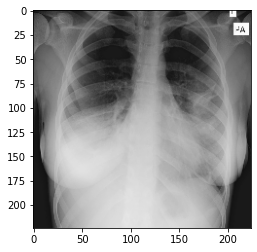

In [ ]:
#print(labelsTest)
print(pred)
#print(np.argmax(pred, axis= 1))
plt.imshow(image)